In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use("seaborn")

In [2]:
df = pd.read_csv('data/user-item-interactions.csv')
df_content = pd.read_csv('data/articles_community.csv')
del df['Unnamed: 0']
del df_content['Unnamed: 0']

# Show df to get an idea of the data
df.head()

,article_id,title,email
0,1430.0,"using pixiedust for fast, flexible, and easier...",ef5f11f77ba020cd36e1105a00ab868bbdbf7fe7
1,1314.0,healthcare python streaming application demo,083cbdfa93c8444beaa4c5f5e0f5f9198e4f9e0b
2,1429.0,use deep learning for image classification,b96a4f2e92d8572034b1e9b28f9ac673765cd074
3,1338.0,ml optimization using cognitive assistant,06485706b34a5c9bf2a0ecdac41daf7e7654ceb7
4,1276.0,deploy your python model as a restful api,f01220c46fc92c6e6b161b1849de11faacd7ccb2


In [3]:
df_content.head()

,doc_body,doc_description,doc_full_name,doc_status,article_id
0,Skip navigation Sign in SearchLoading...\r\n\r...,Detect bad readings in real time using Python ...,Detect Malfunctioning IoT Sensors with Streami...,Live,0
1,No Free Hunch Navigation * kaggle.com\r\n\r\n ...,"See the forest, see the trees. Here lies the c...",Communicating data science: A guide to present...,Live,1
2,☰ * Login\r\n * Sign Up\r\n\r\n * Learning Pat...,Here’s this week’s news in Data Science and Bi...,"This Week in Data Science (April 18, 2017)",Live,2
3,"DATALAYER: HIGH THROUGHPUT, LOW LATENCY AT SCA...",Learn how distributed DBs solve the problem of...,DataLayer Conference: Boost the performance of...,Live,3
4,Skip navigation Sign in SearchLoading...\r\n\r...,This video demonstrates the power of IBM DataS...,Analyze NY Restaurant data using Spark in DSX,Live,4


Exploratory Data Analysis

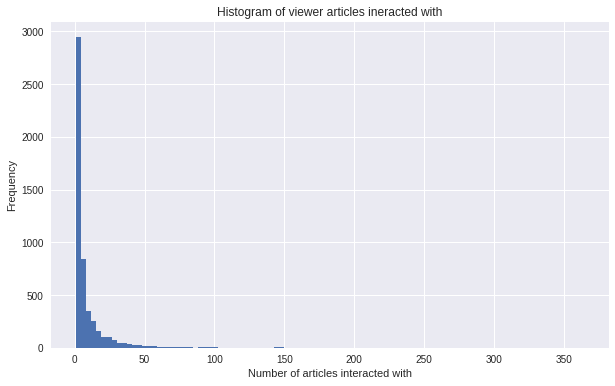

In [4]:
plt.subplots(facecolor='white', edgecolor='k', figsize=(10, 6))
plt.hist(df.groupby("email")["article_id"].count().values, bins=100)
plt.title("Histogram of viewer articles ineracted with")
plt.xlabel("Number of articles interacted with")
plt.ylabel("Frequency")
#plt.yscale("log")
plt.show()

In [5]:
np.median(df.groupby("email")["article_id"].count().values)

3.0

In [6]:
df.groupby("email")["article_id"].count().values.max()

364

In [7]:
median_val = int(np.median(df.groupby("email")["article_id"].count().values))
max_views_by_user = df.groupby("email")["article_id"].count().values.max()

In [8]:
number_duplicated_name = df_content["article_id"].duplicated().sum()

number_duplicated_name

5

In [9]:
df_content[df_content["article_id"].duplicated()]

,doc_body,doc_description,doc_full_name,doc_status,article_id
365,Follow Sign in / Sign up Home About Insight Da...,During the seven-week Insight Data Engineering...,Graph-based machine learning,Live,50
692,Homepage Follow Sign in / Sign up Homepage * H...,One of the earliest documented catalogs was co...,How smart catalogs can turn the big data flood...,Live,221
761,Homepage Follow Sign in Get started Homepage *...,Today’s world of data science leverages data f...,Using Apache Spark as a parallel processing fr...,Live,398
970,This video shows you how to construct queries ...,This video shows you how to construct queries ...,Use the Primary Index,Live,577
971,Homepage Follow Sign in Get started * Home\r\n...,"If you are like most data scientists, you are ...",Self-service data preparation with IBM Data Re...,Live,232


In [10]:
df_content =  df_content.drop_duplicates(['article_id'])

In [11]:
df_content[df_content["article_id"] == 50]

,doc_body,doc_description,doc_full_name,doc_status,article_id
50,Follow Sign in / Sign up Home About Insight Da...,Community Detection at Scale,Graph-based machine learning,Live,50


In [12]:
unique_articles = len(df.article_id.value_counts())
total_articles = len(df_content["article_id"].unique())
unique_users = len(df["email"].unique())- 1 #Remove null user
user_article_interactions = len(df)

the most viewed article

In [13]:
max_views, most_viewed_article_id = df.groupby("article_id")["title"].agg('count').sort_values(ascending=False).iloc[0], \
                                        df.groupby("article_id")["title"].agg('count').sort_values(ascending=False).index[0]

In [14]:
sol_1_dict = {
    '`50% of individuals have _____ or fewer interactions.`': int(median_val),
    '`The total number of user-article interactions in the dataset is ______.`': user_article_interactions,
    '`The maximum number of user-article interactions by any 1 user is ______.`': int(max_views_by_user),
    '`The most viewed article in the dataset was viewed _____ times.`': max_views,
    '`The article_id of the most viewed article is ______.`': str(most_viewed_article_id),
    '`The number of unique articles that have at least 1 rating ______.`': unique_articles,
    '`The number of unique users in the dataset is ______`': unique_users,
    '`The number of unique articles on the IBM platform`': total_articles
}

In [15]:
def sol_1_test(sol_1_dict):
    sol_1_dict_ = {
    '`50% of individuals have _____ or fewer interactions.`': 3,
    '`The total number of user-article interactions in the dataset is ______.`': 45993,
    '`The maximum number of user-article interactions by any 1 user is ______.`': 364,
    '`The most viewed article in the dataset was viewed _____ times.`': 937,
    '`The article_id of the most viewed article is ______.`': '1429.0',
    '`The number of unique articles that have at least 1 rating ______.`': 714,
    '`The number of unique users in the dataset is ______`': 5148,
    '`The number of unique articles on the IBM platform`': 1051,
    }
    
    if sol_1_dict_ == sol_1_dict:
        print("It looks like you have everything right here! Nice job!")
        
    else:
        for k, v in sol_1_dict.items():
            if sol_1_dict_[k] != sol_1_dict[k]:
                print("Oops! It looks like the value associated with: {} wasn't right. Try again.  It might just be the datatype.  All of the values should be ints except the article_id should be a string.  Let each row be considered a separate user-article interaction.  If a user interacts with an article 3 times, these are considered 3 separate interactions.\n\n  Notice you may also find the number of unique users as 5149 if you count the null user.  However, this is hard to catch without mapping first!".format(k))
                

In [16]:
sol_1_test(sol_1_dict)

It looks like you have everything right here! Nice job!


Encoding emails

In [17]:
df['user_id'] = df['email'].astype('category').cat.codes
df = df.drop('email', axis=1)

### Rank-Based Recommendations

we don't actually have ratings for whether a user liked an article or not, we only know that a user has interacted with an article. In these cases, the popularity of an article can really only be based on how often an article was interacted with.

In [18]:
def get_top_articles(n, df=df):
    return df.groupby("title")["user_id"].count().sort_values(ascending=False)[:n].index.tolist()

In [19]:
get_top_articles(10)

['use deep learning for image classification',
 'insights from new york car accident reports',
 'visualize car data with brunel',
 'use xgboost, scikit-learn & ibm watson machine learning apis',
 'predicting churn with the spss random tree algorithm',
 'healthcare python streaming application demo',
 'finding optimal locations of new store using decision optimization',
 'apache spark lab, part 1: basic concepts',
 'analyze energy consumption in buildings',
 'gosales transactions for logistic regression model']

In [20]:
def get_top_article_ids(n, df=df):
    return [str(x) for x in df.groupby("article_id")["user_id"].count().sort_values(ascending=False).index.tolist()][:n]

In [21]:
get_top_article_ids(10)

['1429.0',
 '1330.0',
 '1431.0',
 '1427.0',
 '1364.0',
 '1314.0',
 '1293.0',
 '1170.0',
 '1162.0',
 '1304.0']

### User-User Based Collaborative Filtering

First, we need to form user-article matrix

In [22]:
def create_matrix(df):
    matrix = df.groupby(['user_id', 'article_id'])['title'].count().unstack()
    matrix = abs(matrix.isna().astype(int)-1)
    return matrix
matrix = create_matrix(df)

In [23]:
matrix.shape

(5149, 714)

In [24]:
matrix.sum(axis=1)

user_id
-1       13
 0       12
 1        4
 2        3
 3        5
         ..
 5143     1
 5144     2
 5145    27
 5146     7
 5147     6
Length: 5149, dtype: int64

In [25]:
def find_similar_users(user_id, matrix=matrix):
    user_list = set(matrix.T.columns.tolist()).difference(set([user_id]))
    colName = ['neighbour_id', 'similarity', 'num_interactions']
    data_list = [(id , matrix[matrix.index == user_id].dot(matrix.loc[id].T).values[0], matrix.loc[id].values.sum()) for id in user_list]
    similarity_df = pd.DataFrame(data_list, columns = colName)
    most_similar_users = similarity_df.sort_values('similarity', axis=0,ascending=False)

    return most_similar_users.neighbour_id.values.tolist()

In [26]:
find_similar_users(1234, matrix)[:5]

[2040, 2150, 3690, 3033, 3992]

Below, we define a functions to return the articles we would recommend to user

In [27]:
def get_article_names(article_ids, df=df):
     article_names = df[df['article_id'].isin(article_ids)]['title'].drop_duplicates().values.tolist()
     return article_names

def get_user_articles(user_id, matrix=matrix):
    article_ids = matrix.loc[user_id][matrix.loc[user_id] == 1].index.tolist()
    article_names = get_article_names(article_ids)
    return article_ids, article_names

def user_user_recs(user_id, m=10):
    recs = set()
    viewed = get_user_articles(user_id)
    similar_user_id = find_similar_users(user_id)
    for user_id in similar_user_id:
        article_ids, article_names = get_user_articles(user_id)
        recs = recs.union(set(article_ids)) 
        if len(recs) >= m:
            break
    return list(recs)[:m]

In [28]:
get_article_names(user_user_recs(1, 10))

['finding optimal locations of new store using decision optimization',
 'interactive time series with dygraphs',
 'the greatest public datasets for ai – startup grind',
 'working interactively with rstudio and notebooks in dsx',
 'sector correlations shiny app',
 'this week in data science (may 30, 2017)',
 'mapping points with folium',
 'data tidying in data science experience',
 'employed population by occupation and age',
 'from scikit-learn model to cloud with wml client']

 Now we are going to improve the consistency of the user_user_recs function from above. Instead of giving articles that is the most interacted by close users, we would recommend those, that current user hasn't read yet.


In [29]:
def get_top_users(user_id, df=df, matrix=matrix):

    similar_users = find_similar_users(user_id)

    dict_4_df = {'neighbor_id': [],
                'similarity': [],
                'num_interactions': []}

    for uid in similar_users:
        dict_4_df["neighbor_id"].append(uid)
        dict_4_df["similarity"].append(matrix.T[user_id].values.dot(matrix.T[uid].values))
        dict_4_df["num_interactions"].append(matrix.T[uid].sum())
    
    neighbors_df = pd.DataFrame(dict_4_df).sort_values(["similarity", 
                                                        "num_interactions"], ascending = [False, 
                                                                                          False])
    
    return neighbors_df 

In [30]:
def user_user_recs_v2(user_id, m = 10):
    read_article_ids, read_article_names = get_user_articles(user_id)
    similar_user_ids = get_top_users(user_id).rename({"neighbor_id": "user_id"}, axis=1)
    recs = []
    for uid in similar_user_ids["user_id"].values.tolist():
        article_ids, article_names = get_user_articles(uid)

        for article in article_ids:
            if article not in read_article_ids:
                recs.append(article)
            if len(recs) >= m:
                break
        if len(recs) >= m:
            break
    
    rec_names = get_article_names(recs)
    
    return recs, rec_names


Example of top 10 recomendations for user 20

In [31]:
user_user_recs_v2(10, 20)

([2.0,
  12.0,
  14.0,
  16.0,
  26.0,
  28.0,
  29.0,
  33.0,
  43.0,
  50.0,
  74.0,
  76.0,
  108.0,
  109.0,
  120.0,
  124.0,
  131.0,
  164.0,
  193.0,
  194.0],
 ['got zip code data? prep it for analytics. – ibm watson data lab – medium',
  'timeseries data analysis of iot events by using jupyter notebook',
  'data science for real-time streaming analytics',
  'simple graphing with ipython and\xa0pandas',
  'graph-based machine learning',
  '520    using notebooks with pixiedust for fast, flexi...\nName: title, dtype: object',
  'python machine learning: scikit-learn tutorial',
  'deep learning with tensorflow course by big data university',
  'learn tensorflow and deep learning together and now!',
  'using brunel in ipython/jupyter notebooks',
  'experience iot with coursera',
  'tensorflow quick tips',
  'the 3 kinds of context: machine learning and the art of the frame',
  'spark 2.1 and job monitoring available in dsx',
  'deep forest: towards an alternative to deep neural n

### Matrix Factorization

In [32]:
matrix.shape

(5149, 714)

Using SVD for user-item matrix decomposition

In [33]:
u, s, vt = np.linalg.svd(matrix)

Let's look at how accuracy depends on number of features

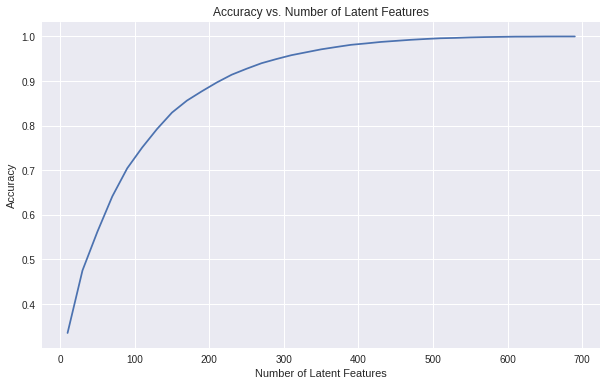

In [34]:


num_latent_feats = np.arange(10,700+10,20)
sum_errs = []

for k in num_latent_feats:
    s_new, u_new, vt_new = np.diag(s[:k]), u[:, :k], vt[:k, :]
    
    user_item_est = np.around(np.dot(np.dot(u_new, s_new), vt_new))
    
    diffs = np.subtract(matrix, user_item_est)
    
    err = np.sum(np.sum(np.abs(diffs)))
    sum_errs.append(err)
    
fig, ax = plt.subplots(figsize = (10, 6), facecolor='white', edgecolor='k')
    
plt.plot(num_latent_feats, 1 - np.array(sum_errs)/df.shape[0]);
plt.xlabel('Number of Latent Features');
plt.ylabel('Accuracy');
plt.title('Accuracy vs. Number of Latent Features');



Now let us split df into train and test sets and train decomposition to predict on test data

In [35]:
df_train = df.head(40000)
df_test = df.tail(5993)


In [36]:
def create_test_and_train_user_item(df_train, df_test):

    user_item_train = create_matrix(df_train)
    user_item_test = create_matrix(df_test)
    
    train_idx = set(user_item_train.index)
    test_idx = set(user_item_test.index)
    match_idx = list(train_idx.intersection(test_idx))
    
    train_arts = set(user_item_train.columns)
    test_arts =  set(user_item_test.columns)
    match_cols = list(train_arts.intersection(test_arts))

    user_item_test = user_item_test.loc[match_idx, match_cols]

    return user_item_train, user_item_test, test_idx, test_arts

user_item_train, user_item_test, test_idx, test_arts = create_test_and_train_user_item(df_train, df_test)

In [37]:
u_train, s_train, vt_train = np.linalg.svd(np.array(user_item_train, dtype='int'), full_matrices=False)

In [38]:
row_idxs = user_item_train.index.isin(test_idx)
col_idxs = user_item_train.columns.isin(test_arts)
u_test = u_train[row_idxs, :]
vt_test = vt_train[:, col_idxs]

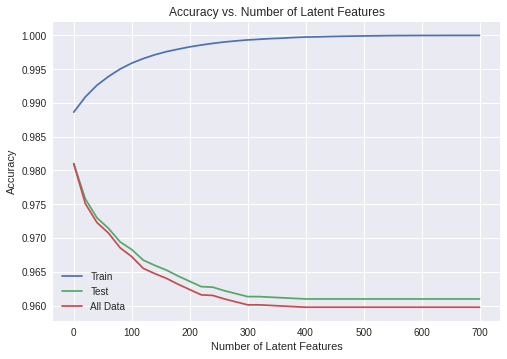

In [39]:
num_latent_feats = np.arange(0,700+10,20)
sum_errs_train = []
sum_errs_test = []
all_errs = []

for k in num_latent_feats:
    # restructure with k latent features
    s_train_lat, u_train_lat, vt_train_lat = np.diag(s_train[:k]), u_train[:, :k], vt_train[:k, :]
    u_test_lat, vt_test_lat = u_test[:, :k], vt_test[:k, :]
    
    # take dot product
    user_item_train_preds = np.around(np.dot(np.dot(u_train_lat, s_train_lat), vt_train_lat))
    user_item_test_preds = np.around(np.dot(np.dot(u_test_lat, s_train_lat), vt_test_lat))
    all_errs.append(1 - ((np.sum(user_item_test_preds)+np.sum(np.sum(user_item_test)))/(user_item_test.shape[0]*user_item_test.shape[1])))
    
    
    # compute error for each prediction to actual value
    diffs_train = np.subtract(user_item_train, user_item_train_preds)
    diffs_test = np.subtract(user_item_test, user_item_test_preds)
    
    # total errors and keep track of them
    err_train = np.sum(np.sum(np.abs(diffs_train)))
    err_test = np.sum(np.sum(np.abs(diffs_test)))
    
    sum_errs_train.append(err_train)
    sum_errs_test.append(err_test)
    
    
plt.plot(num_latent_feats, 1 - np.array(sum_errs_train)/(user_item_train.shape[0]*user_item_test.shape[1]), label='Train');
plt.plot(num_latent_feats, 1 - np.array(sum_errs_test)/(user_item_test.shape[0]*user_item_test.shape[1]), label='Test');
plt.plot(num_latent_feats, all_errs, label='All Data');
plt.xlabel('Number of Latent Features');
plt.ylabel('Accuracy');
plt.title('Accuracy vs. Number of Latent Features');
plt.legend();